In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('data/spaceship-titanic/train.csv')
data_test = pd.read_csv('data/spaceship-titanic/test.csv')

In [4]:
from sklearn.model_selection import train_test_split

data_train, data_dev = train_test_split(data, test_size=0.3)

In [6]:
data_train.shape

(6085, 14)

In [7]:
data_dev.shape

(2608, 14)

In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6085 entries, 6051 to 3051
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6085 non-null   object 
 1   HomePlanet    5944 non-null   object 
 2   CryoSleep     5927 non-null   object 
 3   Cabin         5955 non-null   object 
 4   Destination   5967 non-null   object 
 5   Age           5969 non-null   float64
 6   VIP           5929 non-null   object 
 7   RoomService   5951 non-null   float64
 8   FoodCourt     5956 non-null   float64
 9   ShoppingMall  5934 non-null   float64
 10  Spa           5963 non-null   float64
 11  VRDeck        5946 non-null   float64
 12  Name          5950 non-null   object 
 13  Transported   6085 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 671.5+ KB


In [9]:
data_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,5969.000000,5951.000000,5956.000000,5934.000000,5963.000000,5946.000000
mean,28.713855,230.827256,449.393385,175.186889,308.836156,306.518836
std,14.432282,690.737956,1582.575005,604.216444,1156.211949,1135.665240
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,52.000000,77.000000,30.000000,53.500000,44.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,17306.000000


In [18]:
x = data_train['PassengerId'].str.split('_',expand=True)[0].astype(int).unique()
y = data_dev['PassengerId'].str.split('_',expand=True)[0].astype(int).unique()
z = data_test['PassengerId'].str.split('_',expand=True)[0].astype(int).unique()

In [16]:
len(x)

4668

In [17]:
len(y)

2304

In [20]:
len(z)

3063

In [26]:
len(np.intersect1d(x,y))

755

In [27]:
len(np.intersect1d(x,z))

0

In [30]:
def extract_group(x):
    return int(x.split("_")[0])

data['Group'] = data['PassengerId'].apply(extract_group)

In [37]:
x = data[['PassengerId','Group']].groupby('Group').nunique().rename({'PassengerId':"GroupSize"},axis=1).reset_index()
data = pd.merge(left=data, right=x, how='left', on='Group')

In [40]:
data_test['Group'] = data_test['PassengerId'].apply(extract_group)
x = data_test[['PassengerId','Group']].groupby('Group').nunique().rename({'PassengerId':"GroupSize"},axis=1).reset_index()
data_test = pd.merge(left=data_test, right=x, how='left', on='Group')

In [63]:
data_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Group,GroupSize
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,13,1
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,18,1
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,19,1
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,21,1
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,9266,2
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,9269,1
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,9271,1
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,9273,1


In [42]:
data_train, data_dev = train_test_split(data, test_size=0.3, random_state=100)

In [43]:
data_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,GroupSize
4825,5145_01,Earth,True,G/841/S,TRAPPIST-1e,18.0,False,0.0,0.0,0.0,0.0,0.0,Shaele Mathison,True,5145,1
6702,7073_01,Earth,True,G/1161/S,TRAPPIST-1e,40.0,False,0.0,0.0,0.0,0.0,NaN,Glena Hahnstonsen,True,7073,1
2093,2238_01,Europa,True,A/28/S,55 Cancri e,25.0,False,0.0,0.0,0.0,0.0,0.0,Wasalm Droning,True,2238,1
3207,3450_02,Europa,False,B/132/S,TRAPPIST-1e,21.0,False,0.0,2834.0,0.0,414.0,558.0,Weion Knocke,True,3450,2
175,0198_01,Earth,NaN,G/30/P,PSO J318.5-22,52.0,False,0.0,0.0,0.0,0.0,0.0,Jeroy Cookson,True,198,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0384_01,Earth,False,G/56/S,55 Cancri e,0.0,False,0.0,0.0,0.0,0.0,0.0,Cliney Simpsonks,True,384,2
79,0085_01,Europa,True,C/5/S,TRAPPIST-1e,40.0,False,0.0,0.0,0.0,0.0,0.0,Furudah Ellcefulve,True,85,1
8039,8603_01,Earth,True,NaN,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Hilip Klinson,False,8603,1
6936,7358_01,Earth,False,F/1522/P,55 Cancri e,23.0,False,3.0,0.0,2.0,61.0,634.0,Len Mirez,False,7358,1


<Axes: xlabel='HomePlanet', ylabel='Transported'>

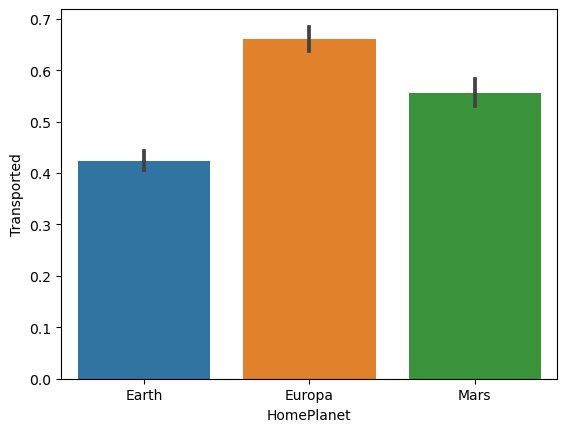

In [45]:
sns.barplot(data=data_train, x='HomePlanet', y='Transported')

<Axes: xlabel='CryoSleep', ylabel='Transported'>

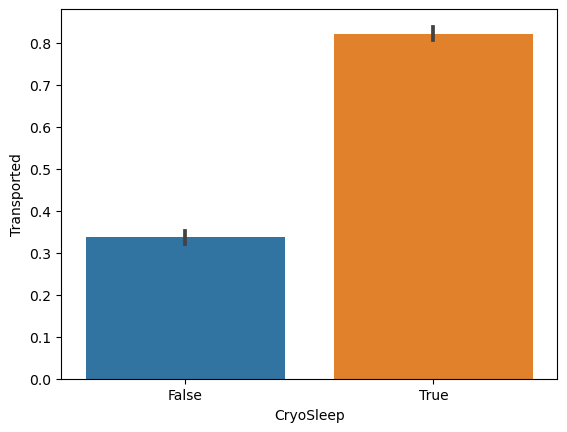

In [46]:
sns.barplot(data=data_train, x='CryoSleep', y='Transported')

<Axes: xlabel='Destination', ylabel='Transported'>

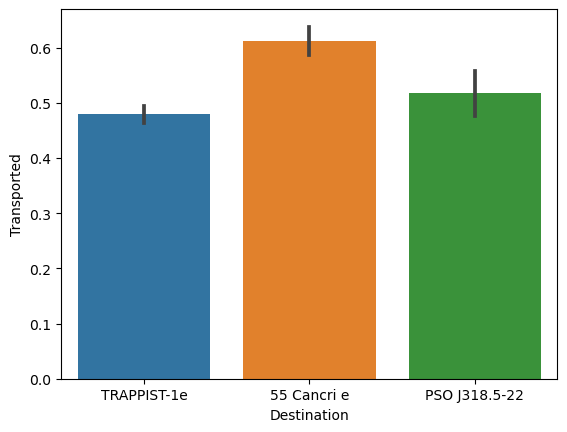

In [47]:
sns.barplot(data=data_train, x='Destination', y='Transported')

In [48]:
import scipy.stats

def check_dependent(data_input,category1,category2):
    a = pd.crosstab(data_input[category1], data_input[category2]).values
    p = scipy.stats.chi2_contingency(a).pvalue
    
    if p > .05:
        print('Probably Indipendent')
    else:
        print('Probably Dependent')

In [49]:
check_dependent(data_train, "CryoSleep", "Transported")

Probably Dependent


In [50]:
check_dependent(data_train, "HomePlanet", "Transported")

Probably Dependent


In [51]:
check_dependent(data_train, "Destination", "Transported")

Probably Dependent


<Axes: xlabel='VIP', ylabel='Transported'>

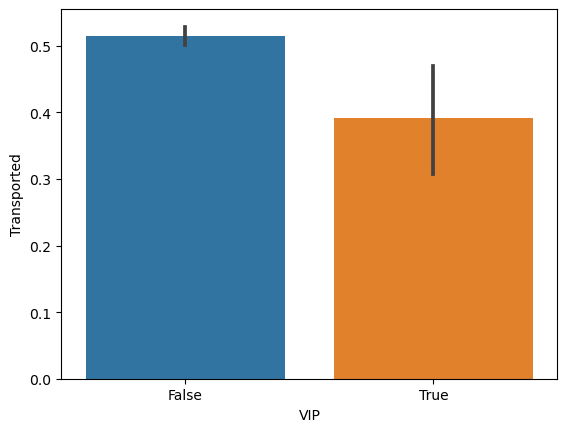

In [52]:
sns.barplot(data=data_train, x='VIP', y='Transported')

In [53]:
check_dependent(data_train, "VIP", "Transported")

Probably Dependent


In [57]:
def extract_deck(x):
    try:
        return x.split('/')[0]
    except:
        return np.nan

def extract_side(x):
    try:
        return x.split('/')[2]
    except:
        return np.nan

In [60]:
data_train['Deck'] = data_train['Cabin'].apply(extract_deck)
data_train['Side'] = data_train['Cabin'].apply(extract_side)

In [62]:
data_dev['Deck'] = data_dev['Cabin'].apply(extract_deck)
data_dev['Side'] = data_dev['Cabin'].apply(extract_side)

In [65]:
data_test['Deck'] = data_test['Cabin'].apply(extract_deck)
data_test['Side'] = data_test['Cabin'].apply(extract_side)

<Axes: xlabel='Deck', ylabel='Transported'>

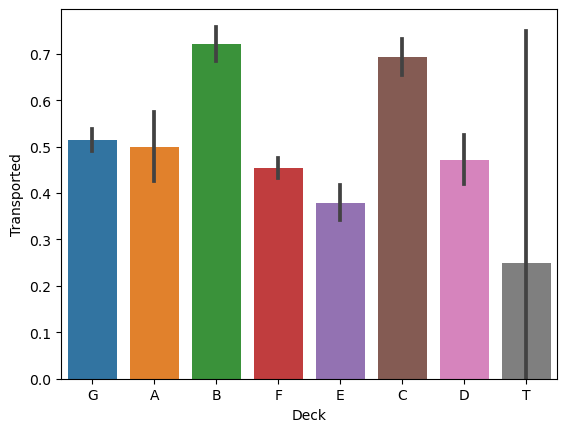

In [66]:
sns.barplot(data=data_train, x='Deck', y='Transported')

In [67]:
data_train['Deck'].value_counts()

F    1978
G    1772
E     609
B     538
C     533
D     339
A     176
T       4
Name: Deck, dtype: int64

In [68]:
data_dev['Deck'].value_counts()

F    816
G    787
E    267
B    241
C    214
D    139
A     80
T      1
Name: Deck, dtype: int64

In [69]:
data_test['Deck'].value_counts()

F    1445
G    1222
E     447
B     362
C     355
D     242
A      98
T       6
Name: Deck, dtype: int64

In [92]:
data_train[data_train['Deck'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,GroupSize,Deck,Side,Spending
6626,6990_01,Earth,False,NaN,PSO J318.5-22,21.0,False,1.0,22.0,0.0,649.0,2.0,Lison Franton,False,6990,1,NaN,NaN,674.0
7244,7746_01,Europa,True,NaN,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Antinon Patoetic,True,7746,1,NaN,NaN,0.0
2726,2926_01,Mars,False,NaN,TRAPPIST-1e,43.0,False,828.0,25.0,545.0,107.0,0.0,Kad Homin,False,2926,1,NaN,NaN,1505.0
1327,1404_02,Europa,False,NaN,TRAPPIST-1e,42.0,False,0.0,51.0,0.0,4170.0,13.0,Arkard Mornaned,False,1404,2,NaN,NaN,4234.0
4390,4662_03,Europa,False,NaN,TRAPPIST-1e,46.0,False,0.0,3856.0,0.0,1.0,312.0,Dyonium Ingwhed,True,4662,3,NaN,NaN,4169.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0932_01,Mars,True,NaN,TRAPPIST-1e,29.0,False,0.0,0.0,0.0,0.0,0.0,Boats Pette,True,932,1,NaN,NaN,0.0
6282,6652_01,Earth,False,NaN,PSO J318.5-22,39.0,False,0.0,69.0,29.0,424.0,18.0,Amyra Hersons,False,6652,1,NaN,NaN,540.0
5939,6302_04,Earth,True,NaN,PSO J318.5-22,3.0,False,0.0,0.0,0.0,0.0,0.0,Debony Joycerton,True,6302,7,NaN,NaN,0.0
8209,8772_02,Europa,False,NaN,55 Cancri e,53.0,False,0.0,1127.0,0.0,3939.0,NaN,Naosura Motled,False,8772,2,NaN,NaN,5066.0


In [95]:
data_train['Side'].value_counts()

S    3043
P    2906
Name: Side, dtype: int64

In [78]:
data_train['Spending'] = data_train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
data_dev['Spending'] = data_dev[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
data_test['Spending'] = data_test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)


In [85]:
# data_train['logSpending'] = n
data_train['logSpending'] = np.log(data_test['Spending'] + 1)

In [88]:
data_train.drop('logSpending', axis=1,inplace=True)

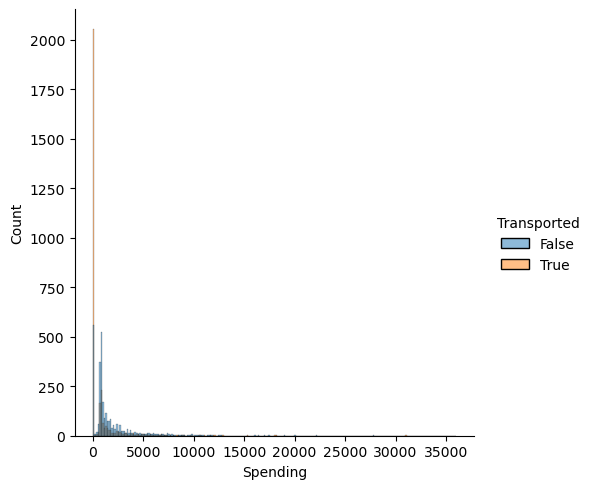

In [103]:
sns.displot(data=data_train, x='Spending', hue='Transported')

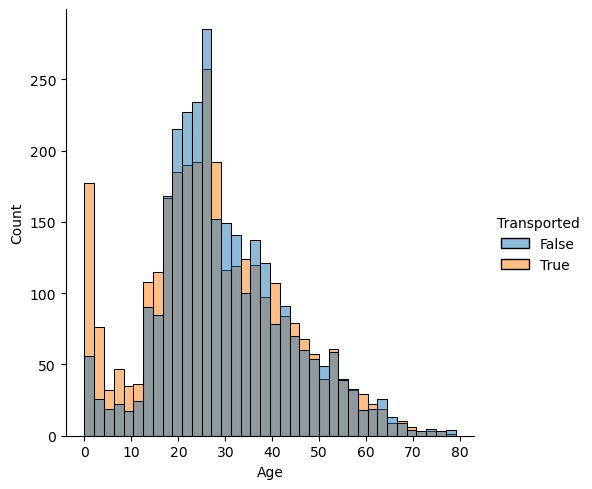

In [82]:
sns.displot(data=data_train, x='Age', hue='Transported')

In [96]:
def impute_deck(x):
    if x == 'T':
        return 'Others'
    elif x is np.nan:
        return 'Others'
    else:
        return x

In [100]:
data_train['Deck'] = data_train['Deck'].apply(impute_deck)
data_dev['Deck'] = data_dev['Deck'].apply(impute_deck)
data_test['Deck'] = data_test['Deck'].apply(impute_deck)

In [102]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6085 entries, 4825 to 5640
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6085 non-null   object 
 1   HomePlanet    5942 non-null   object 
 2   CryoSleep     5944 non-null   object 
 3   Cabin         5949 non-null   object 
 4   Destination   5969 non-null   object 
 5   Age           5963 non-null   float64
 6   VIP           5931 non-null   object 
 7   RoomService   5954 non-null   float64
 8   FoodCourt     5954 non-null   float64
 9   ShoppingMall  5932 non-null   float64
 10  Spa           5948 non-null   float64
 11  VRDeck        5947 non-null   float64
 12  Name          5949 non-null   object 
 13  Transported   6085 non-null   bool   
 14  Group         6085 non-null   int64  
 15  GroupSize     6085 non-null   int64  
 16  Deck          6085 non-null   object 
 17  Side          5949 non-null   object 
 18  Spending      6085 non-nu

In [113]:
data_train['VIP'] = data_train['VIP'].astype(str)
data_dev['VIP'] = data_dev['VIP'].astype(str)
data_test['VIP'] = data_test['VIP'].astype(str)

In [114]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer, OneHotEncoder, StandardScaler

In [115]:
numerical_var = ['Age', 'GroupSize', 'Spending']
categorical_var = ['HomePlanet', 'CryoSleep','Destination', 'VIP', 'Deck', 'Side']
target = 'Transported'

In [118]:
numerical_pipeline = Pipeline(
    steps=[
        ("num_imputer", SimpleImputer(strategy='median')),
        ("transformer", PowerTransformer()),
        ("scaler", StandardScaler())
    ]
)

categorical_pipeline = Pipeline(
    steps=[
        ("cat_imputer", SimpleImputer(strategy='most_frequent')),
        ("encoder", OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
    ]
)

preprocessor = ColumnTransformer(
    [
        ('categorical', categorical_pipeline, categorical_var),
        ('numerical', numerical_pipeline, numerical_var)
    ]
)

In [119]:
preprocessor.fit_transform(data_train[categorical_var + numerical_var])

array([[ 1.        ,  0.        ,  0.        , ..., -0.70613879,
        -0.87561161, -1.13331504],
       [ 1.        ,  0.        ,  0.        , ...,  0.79205609,
        -0.87561161, -1.13331504],
       [ 0.        ,  1.        ,  0.        , ..., -0.1973177 ,
        -0.87561161, -1.13331504],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.70613879,
        -0.87561161, -1.13331504],
       [ 1.        ,  0.        ,  0.        , ..., -0.3387863 ,
        -0.87561161,  0.57387182],
       [ 1.        ,  0.        ,  0.        , ...,  0.34403779,
        -0.87561161, -1.13331504]])

In [124]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

lr = LogisticRegression(random_state=10)
dt = DecisionTreeClassifier(random_state=10)
rf = RandomForestClassifier(random_state=10)
svm = SVC()


X = data_train[categorical_var+numerical_var]
y = data_train[target]


In [128]:
X.reset_index(drop=True, inplace=True)

In [132]:
y.reset_index(drop=True,inplace=True)

In [133]:
kf = KFold(n_splits=5)

result = {
    "LR" : [],
    "DT" : [],
    "RF" : [],
    "SVM": []
}


for train_index, test_index in kf.split(X):
    X_train = X.loc[train_index]
    X_test = X.loc[test_index]
    y_train = y.loc[train_index]
    y_test = y.loc[test_index]
    
    
    X_train = preprocessor.fit_transform(X_train)
    X_test = preprocessor.transform(X_test)
    
    lr.fit(X_train,y_train)
    dt.fit(X_train,y_train)
    rf.fit(X_train,y_train)
    svm.fit(X_train,y_train)

    result["LR"].append(lr.score(X_test,y_test))
    result["DT"].append(dt.score(X_test,y_test))
    result["RF"].append(rf.score(X_test,y_test))
    result["SVM"].append(svm.score(X_test,y_test))

In [139]:
print('Logistic Evaluation:',np.mean(result['LR']))
print('DT Evaluation:',np.mean(result['DT']))
print('RF Evaluation:',np.mean(result['RF']))
print('SVM Evaluation:',np.mean(result['SVM']))

Logistic Evaluation: 0.7406737880032868
DT Evaluation: 0.676417419884963
RF Evaluation: 0.7055053410024652
SVM Evaluation: 0.742810188989318


In [143]:
X_input = preprocessor.fit_transform(X)
model = LogisticRegression(random_state=10)
model.fit(X_input, y)

LogisticRegression(random_state=10)

In [145]:
X_dev = data_dev[categorical_var+numerical_var]
y_dev = data_dev[target]

In [149]:
model.score(preprocessor.transform(X_dev),y_dev)

0.7450153374233128